# 1. Introduction  
Game Winner is a brazilian sports betting company that is very successful in making the right bets and teaching how to bet in sports and you can find their website here: https://gamewinner.com.br/  
Since one of their co-founders, Rodrigo Mota (https://www.linkedin.com/in/rodrigo-mota-358b939a/), is a dear friend of mine for many years now, I asked if he could provide me their data to run some analysis for him, and he readily did so.  
Of the many sports, this analysis is for bettings on soccer games.  
First, we begin importing what is necessary for the project:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib as pl
%matplotlib inline
sns.set()

# 2. Initial Data Analysis  
Right now we import the table into a dataframe and display its content and info:

In [2]:
path = pl.Path (f"../input/sports/futebol.csv")
futebol_df = pd.read_csv(path)
futebol_df.columns = futebol_df.columns.str.strip()
futebol_df

,Data,Jogo,Minutos,Investimento,Odd,Ganho,Resultado
0,2022-07-01,Inglaterra x Israel,60 ao 70,10,1.57,5.7,Green
1,2022-07-01,Ayacucho x Cantolao,10 ao 20,10,1.50,5.0,Green
2,2022-07-01,Ayacucho x Cantolao,20 ao 30,10,1.50,5.0,Green
3,2022-07-01,"Lara x UCV AC. 0,5 GOLS",Gols,10,1.61,6.1,Red
4,2022-07-01,Guairena x Asuncion,20 ao 30,10,1.57,5.7,Green
...,...,...,...,...,...,...,...
1559,2022-10-31,Verona x Roma,Gols,10,4.33,33.3,Green
1560,2022-10-31,Elfsborg x Helsingborg,Gols,20,1.50,10.0,Red
1561,2022-10-31,Verona x Roma,Gols,10,1.50,5.0,Red
1562,2022-10-31,Midtjylland x Odense,Gols,10,1.50,5.0,Red


In [3]:
futebol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          1564 non-null   object 
 1   Jogo          1564 non-null   object 
 2   Minutos       1473 non-null   object 
 3   Investimento  1564 non-null   int64  
 4   Odd           1564 non-null   float64
 5   Ganho         1564 non-null   float64
 6   Resultado     1564 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 85.7+ KB


The column called Data is supposed to be date-time type, so let's convert it.  
Furthermore, removing any accidental blank spaces before and after every row in the Jogo column seems like a good idea to potentially identify duplicated values later on.  
Also, let us take a closer look at the null values.

In [4]:
futebol_df.Data = pd.to_datetime(futebol_df.Data)
futebol_df.Jogo = futebol_df.Jogo.str.strip().str.lower()
futebol_df.isnull().sum()

Data             0
Jogo             0
Minutos         91
Investimento     0
Odd              0
Ganho            0
Resultado        0
dtype: int64

In [5]:
futebol_df.Minutos.value_counts(dropna=False)

00 a 10       260
20 ao 30      194
60 ao 70      174
Gols          155
10 ao 20      147
20 a 30       129
10 a 20       103
60 a 70        95
NaN            91
00 ao 10       85
30 a 40        22
30 ao 40       17
70 a 80        15
50 ao 60       11
50 a 60        11
70 ao 80       10
Asiáticos       8
80 a 90         8
20 a 30         5
20 aos 30       4
Multipla        4
aos 30          2
2 marcam        2
60 aos 70       1
10 aos 20       1
00 a 10         1
Cartões         1
Vencedor        1
Múltipla        1
Escanteio       1
gols            1
Mult            1
Pedro           1
60 a 70         1
Gols duplo      1
Name: Minutos, dtype: int64

Ok, the data owner explained to me that all those numbers refers to time periods of a match in which corners happened, so several of them should be together.  
Besides, the null values are actually unknown (desconhecido in portuguese) time periods.  
Therefore, I'm going to have to adjust those rows, and finally check for values in duplicity.

In [6]:
futebol_df.Minutos = futebol_df.Minutos.str.strip().str.lower()
futebol_df.Minutos = futebol_df.Minutos.str.replace('aos', 'a', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('ao', 'a', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('multipla', 'múltipla', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('mult', 'múltipla', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('a 30', 'temp', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('20 temp', '20 a 30', regex=False)
futebol_df.Minutos = futebol_df.Minutos.str.replace('temp', '30 a 40', regex=False)
futebol_df.Minutos.fillna('desconhecido', inplace=True)
futebol_df.duplicated().sum()

22

In [7]:
futebol_df[futebol_df.duplicated()]

,Data,Jogo,Minutos,Investimento,Odd,Ganho,Resultado
412,2022-08-05,guarani x gremio,desconhecido,10,1.50,5.0,Green
431,2022-08-06,botafogo x ceará,desconhecido,10,1.50,5.0,Green
458,2022-08-07,danubio x maldonado,desconhecido,10,1.50,5.0,Green
670,2022-08-22,arg jrs x patronato,50 a 60,10,1.53,5.3,Green
752,2022-08-26,sagan tusu x fukuoka,20 a 30,10,1.66,6.6,Green
1214,2022-10-05,flamengo x inter,20 a 30,10,1.50,5.0,Green
1303,2022-10-11,copenhagen x city,20 a 30,10,1.57,5.7,Green
1306,2022-10-11,milan x chelsea,00 a 10,10,1.66,6.6,Green
1307,2022-10-11,psg x benfica,00 a 10,10,1.61,6.1,Green
1308,2022-10-11,dortmund x sevilla,20 a 30,10,1.61,6.1,Green


All the double rows are in fact a new bet with the same characteristics.  
Then I must drop them while summing the bet values (Investimento column) and the profit in a win scenario (Ganho column).

In [8]:
futebol_df=futebol_df.groupby(list(futebol_df.columns), as_index=False).agg({'Investimento': 'sum', 'Ganho': 'sum'})
futebol_df.shape

(1542, 7)

Now I will turn each criteria with less than 8 occurrences in Minutos column into one value only, called outros (which means others), except for the 80 a 90 value - since it's a corner time period as well - and see how many unique values the dataframe has.

In [9]:
aux = futebol_df.Minutos.value_counts()
for kind in aux.index:
    if aux [kind] < 8:
        futebol_df.loc [futebol_df.Minutos == kind, "Minutos"] = "asiáticos"
futebol_df.Minutos = futebol_df.Minutos.str.replace('asiáticos', 'outros', regex=False)
futebol_df.nunique()


Data             116
Jogo            1268
Minutos           11
Odd               34
Resultado          2
Investimento       7
Ganho             53
dtype: int64

# 3. Exploratory Data Analysis  
Time for a deeper analysis has come.  
Starting by counting the betting values distribution.

In [10]:
futebol_df.Investimento.value_counts(normalize=True)

10    0.861868
40    0.081712
20    0.039559
5     0.013619
25    0.001297
2     0.001297
80    0.000649
Name: Investimento, dtype: float64

We can see that more than 85% is from a betting value of 10.  
And how about the criteria distribution?

<AxesSubplot:xlabel='count', ylabel='Minutos'>

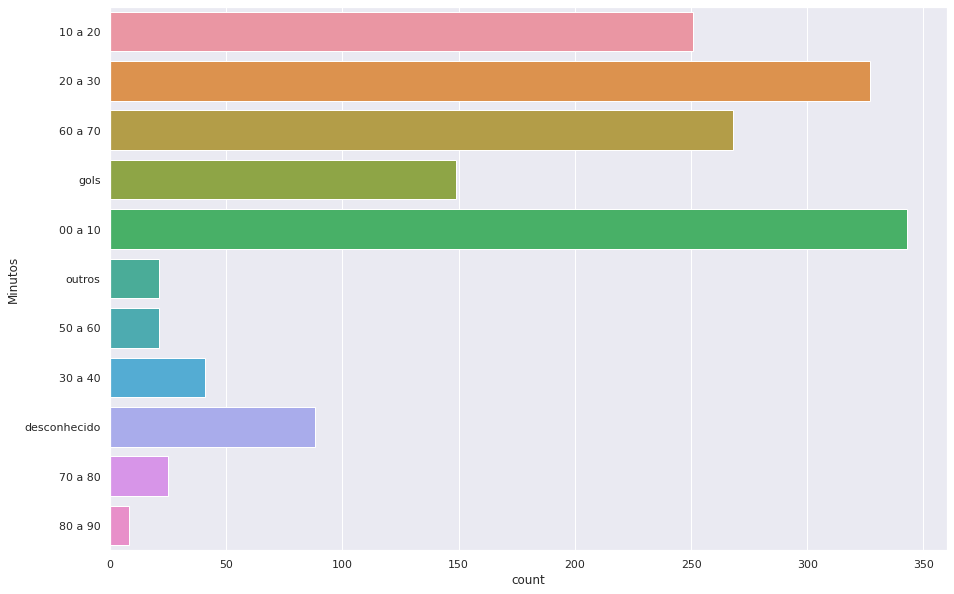

In [11]:
plt.figure (figsize = (15,10))
sns.countplot(y='Minutos', data=futebol_df)

A great idea is breaking down those occurrences according to the results they got:

<AxesSubplot:xlabel='count', ylabel='Minutos'>

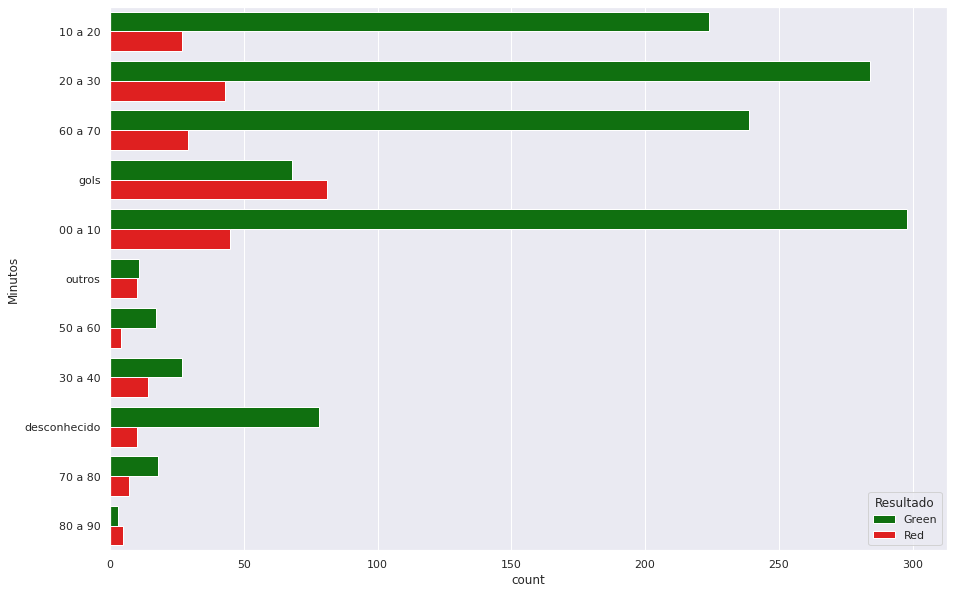

In [12]:
colors = ['Green', 'Red']
plt.figure (figsize = (15,10))
sns.countplot(y='Minutos', hue='Resultado', data=futebol_df, palette=colors)

At this moment I want to view their performance over time:

<AxesSubplot:xlabel='Data', ylabel='Count'>

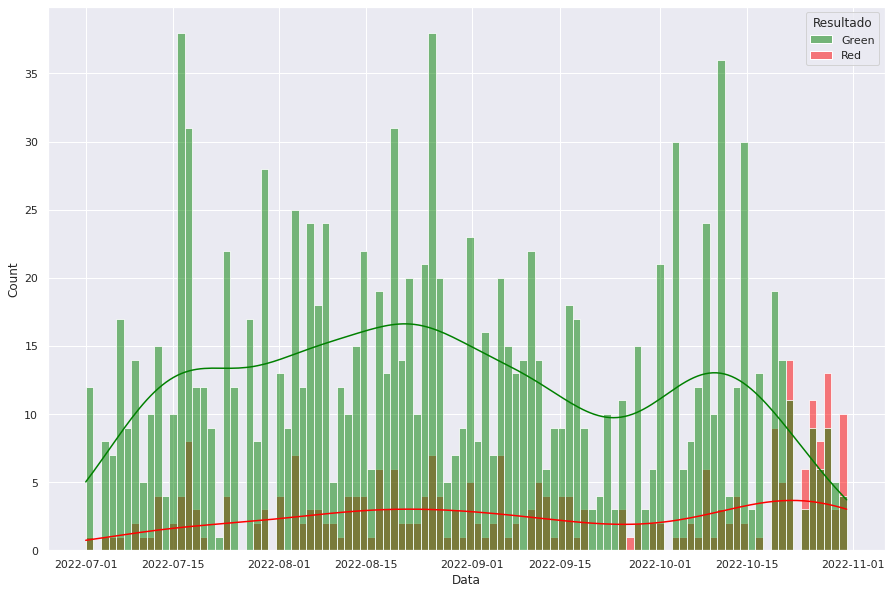

In [13]:
plt.figure (figsize = (15,10))
sns.histplot(x='Data', hue='Resultado', data=futebol_df, bins=100, kde=True, palette=colors)

It's very easy to visualize they got much more positive results during most of the time and that's excellent.  
But recently they're decreasing meanwhile the negative outcomes are increasing.  
I wonder what has happened.  
In order to find out, let me check which betting values are responsible for green or red times.


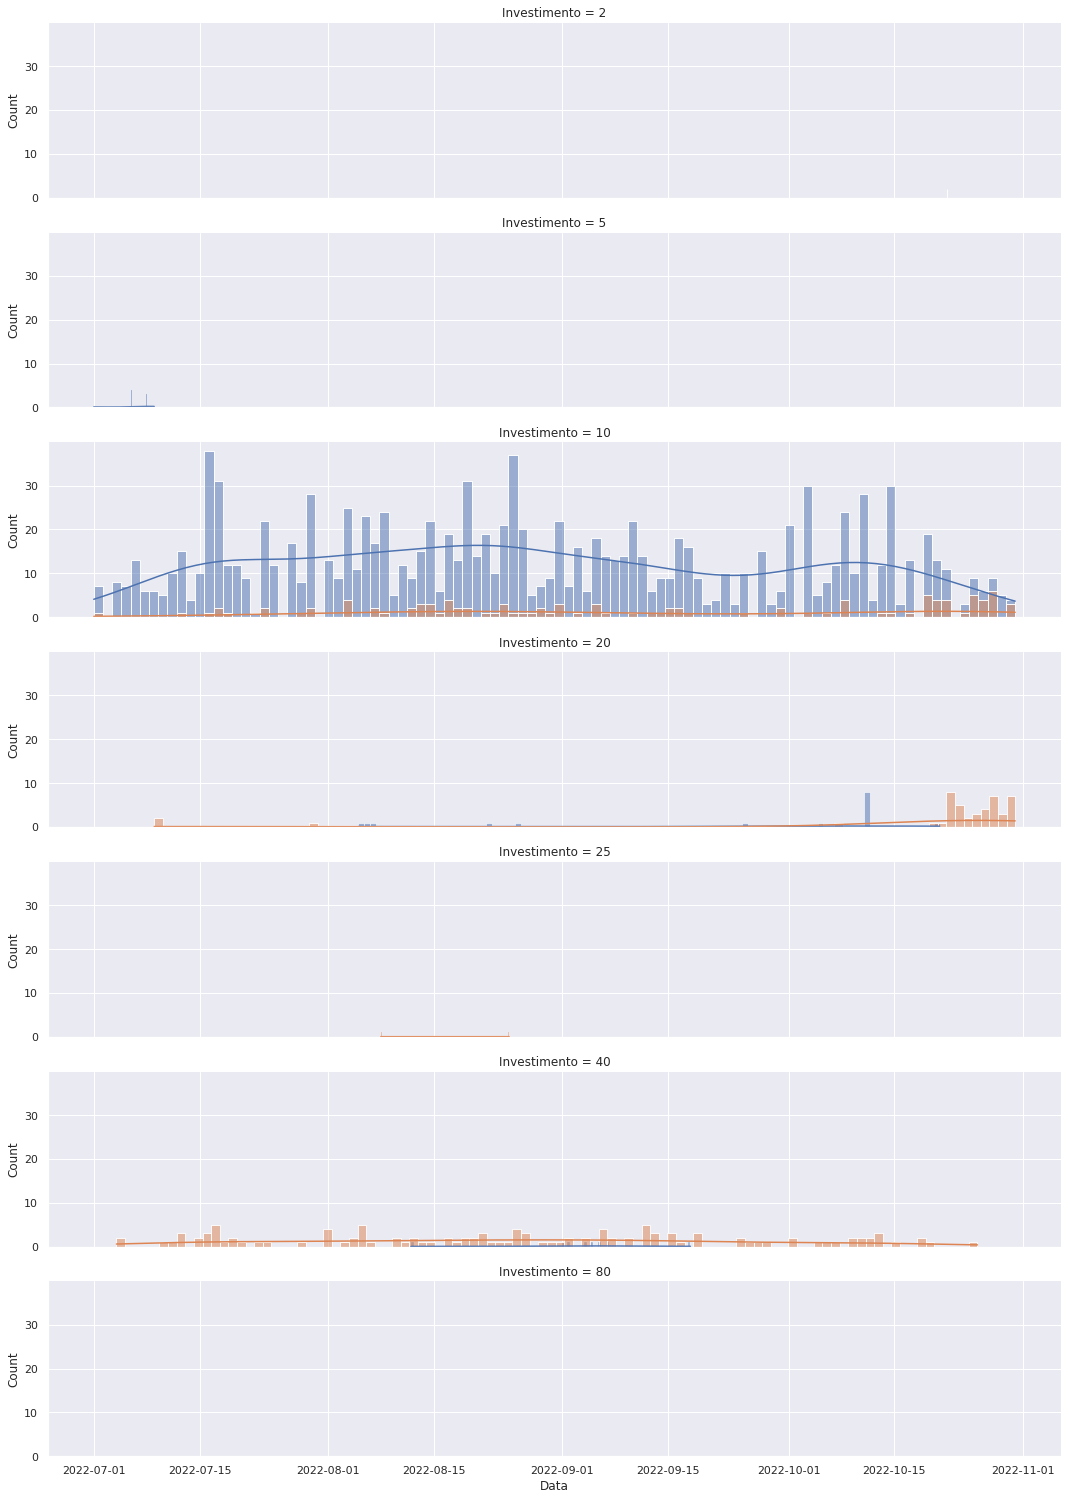

In [14]:
g = sns.FacetGrid(futebol_df, row="Investimento", hue="Resultado", aspect=5)
g.map(sns.histplot, 'Data', kde=True, bins=100)

Alright, the 40 values are almost all losses,the gains are near to exclusively from 10 values and they're becoming more scarce nowadays.  
While at the same time their negative results are happening more frequently, and in addition to this, 20 values has shown up with significant losses too.  
It makes us question whether some criteria are more or less behind these outcomes.

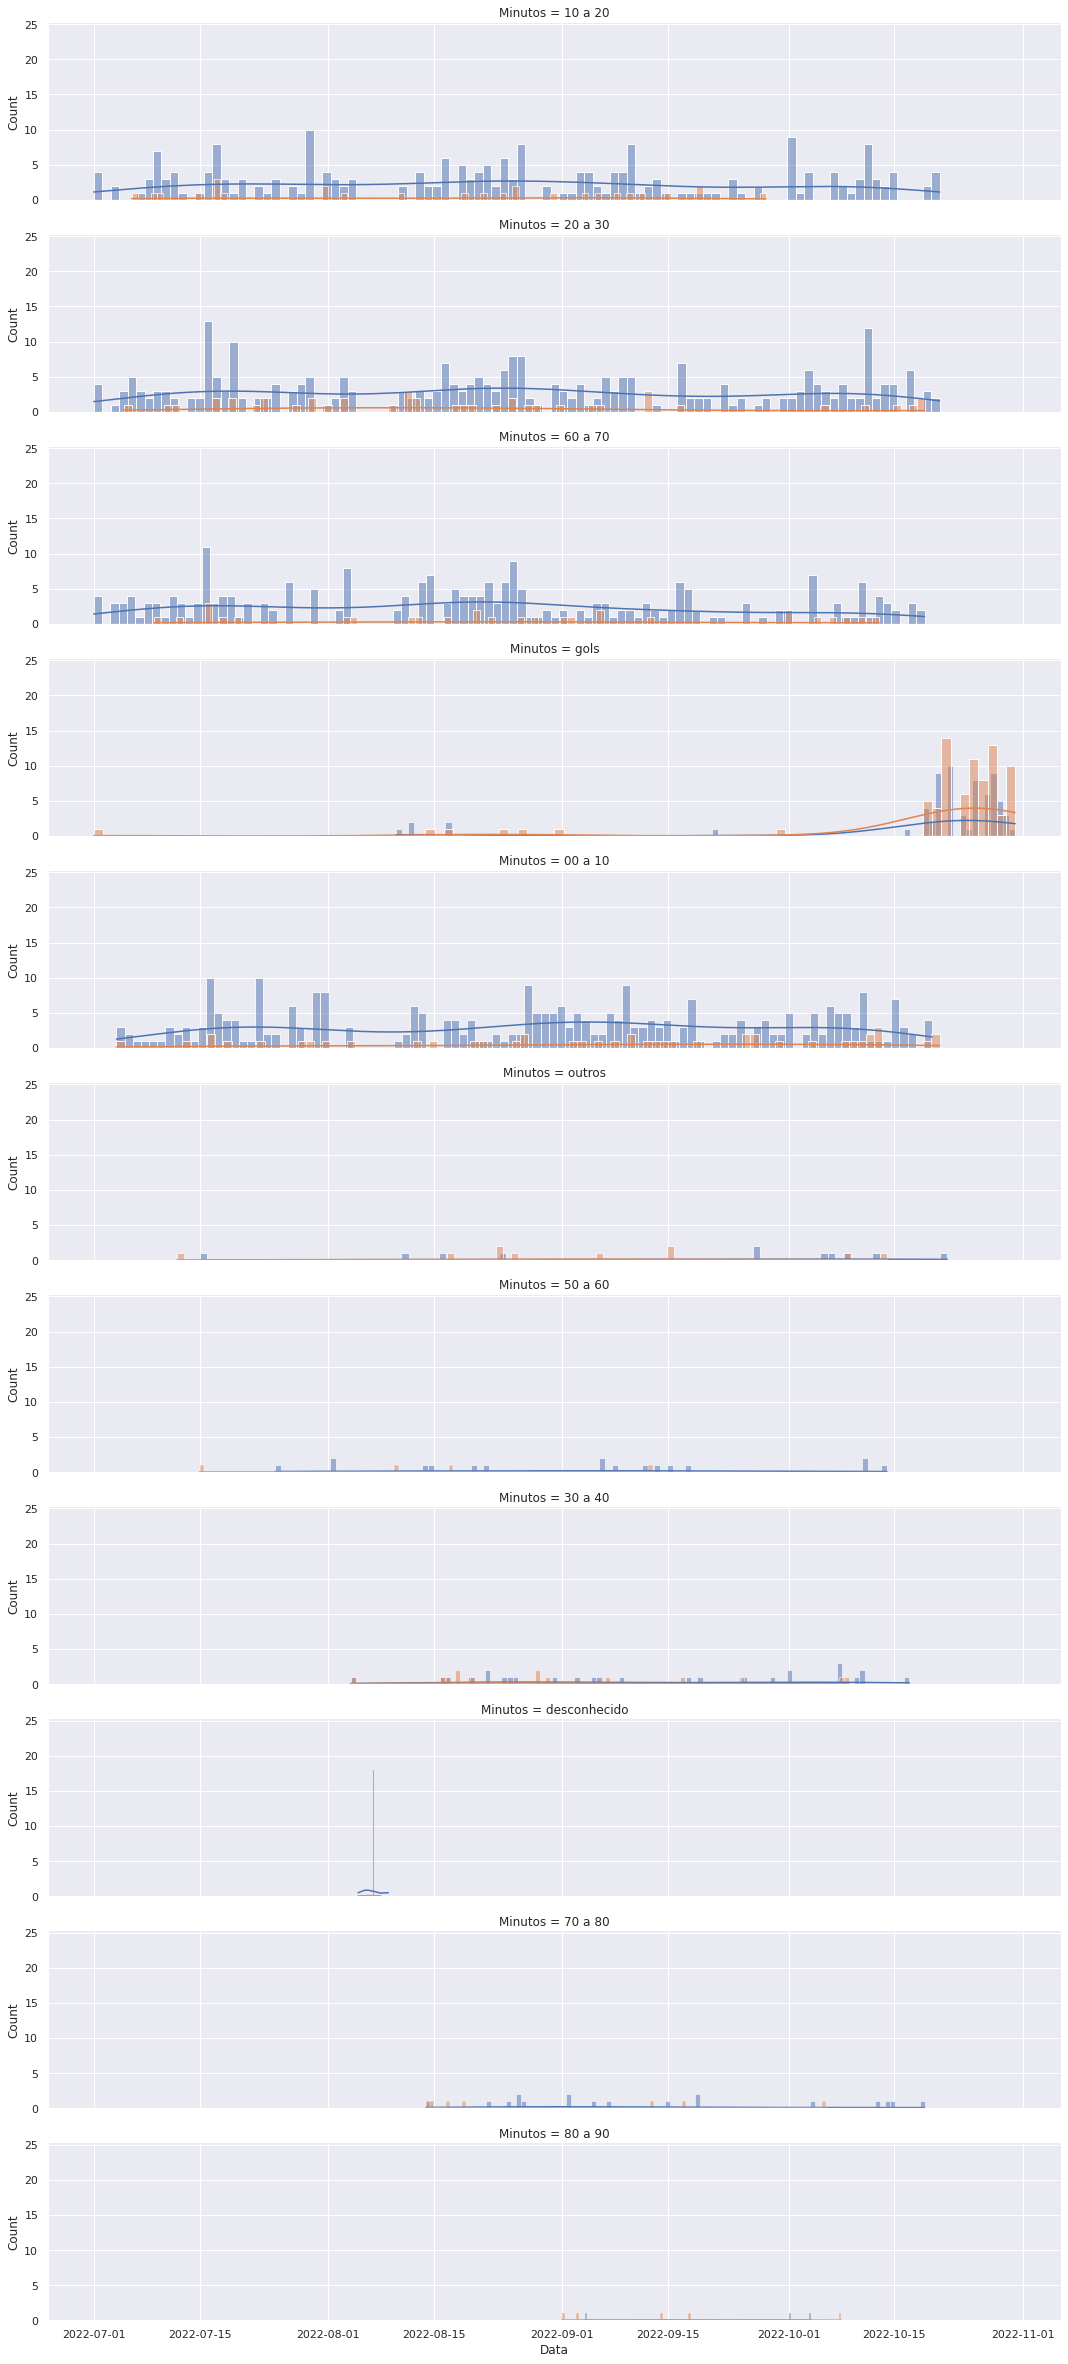

In [15]:
g = sns.FacetGrid(futebol_df, row="Minutos", hue="Resultado", aspect=5)
g.map(sns.histplot, 'Data', kde=True, bins=100)

# 4. Conclusion  
Apparently, we found the culprit.  
They stopped betting on corner time periods, which they were extremely good at, and started betting on goals, and they're not scoring that well, by the way.  
And how much is the overall performance so far?

In [16]:
futebol_df.Resultado.value_counts(normalize=True)

Green    0.82166
Red      0.17834
Name: Resultado, dtype: float64

The company has still accumulated an incredible greater than 80 percent positive outcomes since the beginning of the activities.  
Basically they are faced with a choice to make:  
Either improve their technique in betting on goals criteria;  
Or revert back in betting on corners, where they are already pretty awesome.